# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="-MIDS---w261-Machine-Learning-At-Scale--1" href="#-MIDS---w261-Machine-Learning-At-Scale-"><span class="toc-item-num">1&nbsp;&nbsp;</span> MIDS - w261 Machine Learning At Scale </a></div><div class="lev2 toc-item"><a data-toc-modified-id="Assignment---HW11-11" href="#Assignment---HW11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Assignment - HW11</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Instructions-2" href="#Instructions"><span class="toc-item-num">2&nbsp;&nbsp;</span>Instructions</a></div><div class="lev2 toc-item"><a data-toc-modified-id="IMPORTANT-21" href="#IMPORTANT"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>IMPORTANT</a></div><div class="lev3 toc-item"><a data-toc-modified-id="===-INSTRUCTIONS-for-SUBMISSIONS-===-211" href="#===-INSTRUCTIONS-for-SUBMISSIONS-==="><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>=== INSTRUCTIONS for SUBMISSIONS ===</a></div><div class="lev1 toc-item"><a data-toc-modified-id="2-Useful-References-3" href="#2-Useful-References"><span class="toc-item-num">3&nbsp;&nbsp;</span>2 Useful References</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW-Problems-4" href="#HW-Problems"><span class="toc-item-num">4&nbsp;&nbsp;</span>HW Problems</a></div><div class="lev2 toc-item"><a data-toc-modified-id="HW11.0:-Broadcast-versus-Caching-in-Spark-41" href="#HW11.0:-Broadcast-versus-Caching-in-Spark"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>HW11.0: Broadcast versus Caching in Spark</a></div><div class="lev2 toc-item"><a data-toc-modified-id="HW11.1-Loss-Functions-42" href="#HW11.1-Loss-Functions"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>HW11.1 Loss Functions</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Response:-421" href="#Response:"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Response:</a></div><div class="lev2 toc-item"><a data-toc-modified-id="HW11.2-Gradient-descent-43" href="#HW11.2-Gradient-descent"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>HW11.2 Gradient descent</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Response-431" href="#Response"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Response</a></div><div class="lev2 toc-item"><a data-toc-modified-id="HW11.3-Logistic-Regression-44" href="#HW11.3-Logistic-Regression"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>HW11.3 Logistic Regression</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Response-441" href="#Response"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Response</a></div><div class="lev2 toc-item"><a data-toc-modified-id="HW11.4-SVMs-45" href="#HW11.4-SVMs"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>HW11.4 SVMs</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Response-451" href="#Response"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Response</a></div>

In [1]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [2]:
%reload_ext autoreload
%autoreload 2

<h1> MIDS - w261 Machine Learning At Scale </h1>

<h2>Project 11</h2>


---
__Name:__  Hyera Moon   
__Week:__   11



# 2 Useful References

* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. (Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))
* https://www.dropbox.com/s/ngomebw1koujs2d/classificationISLBook-Logistic-Regression-LDA-NaiveBayes.pdf?dl=0

# HW Problems


In [1]:
import os
import sys
spark_home = os.environ['SPARK_HOME'] = '/usr/lib/spark2/spark-2.0.0-bin-hadoop2.6'
if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.10.1-src.zip'))
execfile(os.path.join(spark_home,'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.0.0
      /_/

Using Python version 2.7.12 (default, Jul  2 2016 17:42:40)
SparkSession available as 'spark'.


## HW11.0: Broadcast versus Caching in Spark 


Q: __What is the difference between broadcasting and caching data in Spark? Give an example (in the context of machine learning) of each mechanism (at a highlevel). Feel free to cut and paste code examples from the lectures to support your answer.__

Q: __Review the following Spark-notebook-based implementation of KMeans and use the broadcast pattern to make this implementation more efficient. Please describe your changes in English first, implement, comment your code and highlight your changes (write all your code in this notebook):___

Notebook
https://www.dropbox.com/s/41q9lgyqhy8ed5g/EM-Kmeans.ipynb?dl=0

Notebook via NBViewer
http://nbviewer.ipython.org/urls/dl.dropbox.com/s/41q9lgyqhy8ed5g/EM-Kmeans.ipynb


In [ ]:
# START STUDENT CODE 11.0
# (ADD CELLS AS NEEDED)



** Q1: difference between broadcasting and caching data in Spark **

Instead of variables copied to each node which makes the tasks inefficient and increases communication costs, broadcast variable allow to keep a read-only variable cached on each machine rather than shipping a copy of it with tasks. Thus, broadcasting variable is useful when tasks for multiple workers need the same variable and often multiple times (e.g. iterations). For example, in K-means algorithm, at each iteration, the centroids variable can be broadcasted to all worker nodes and also for each iteration. Broadcasting is particularly useful for variable with large dataset: it allows to give every node a copy of this large input dataset in an efficient manner. Spark also attempts to distribute broadcast variables using efficient broadcast algorithms to reduce communication cost.

Caching a variable allows the data of the variable to be used across operations. When you persist an RDD, each node stores any partitions of it that it computes in memory and reuses them in other actions on that dataset (or datasets derived from it). This allows future actions to be much faster (often by more than 10x). Caching is a key tool for iterative algorithms and fast interactive use. However, 




** Example: Linear Regression Algorithm based on Gradient Descent **  
Assuming a high dimensional case resulting in a large data for weight vector variable "w", without broadcasting w, the code below is inefficient. This is mainly due to w that will be divided into n chunks and a copy of each chunk will be shipped to the workers increasing the communication cost.

In [ ]:
# Example of Linear Regression without broadcasting
def linearRegressionGD(data, wInitial=None, learningRate=0.05, iterations=50):
    featureLen = len(data.take(1)[0])-1
    n = data.count()
    if wInitial is None:  #start learning from a random vector
        w = np.random.normal(size=featureLen) # w should be broadcasted if it is large
    else:                 #start from provided vector
        w = wInitial
    for i in range(iterations):
        gradient = data.map(lambda d: -2 * (d[0] - np.dot(wBroadcast.value, d[1:])) * np.array(d[1:])) \
                    .reduce(lambda a, b: a + b)
        w = w - learningRate * gradient/n
    return w

However, broadcasting weight vector w as shown in the code below, the weights data can be kept as a read-only variable cached on each machine instead of sending n chunks of w to each machine (thus, only shipped once to each machine). Thus, broadcasting weight vector is like book keeping weight information for the learning algorithm that we wish to share with each executor and will be updated at each iteration.

In [ ]:
# Example of Linear Regression with broadcasting
def linearRegressionGD(data, wInitial=None, learningRate=0.05, iterations=50):
    featureLen = len(data.take(1)[0])-1
    n = data.count()
    if wInitial is None:  #start learning from a random vector
        w = np.random.normal(size=featureLen) # w should be broadcasted if it is large
    else:                 #start from provided vector
        w = wInitial
    for i in range(iterations):
        wBroadcast = sc.broadcast(w) #make available in memory as read-only to the executors (for mappers and reducers)
        gradient = data.map(lambda d: -2 * (d[0] - np.dot(wBroadcast.value, d[1:])) * np.array(d[1:])) \
                    .reduce(lambda a, b: a + b)
        w = w - learningRate * gradient/n
    return w

** Q: KMeans with broadcast pattern **

In [5]:
# Data generation

%matplotlib inline
import numpy as np
import pylab 
import json
size1 = size2 = size3 = 1000
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

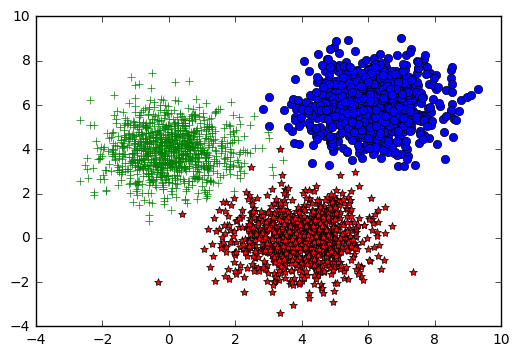

In [6]:
# Data visualization

pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

In [7]:
import numpy as np

#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroidsBroadcast.value)**2, axis=1).argmin()  # use ".value" for broadcast centroids
    return (closest_centroid_idx,(x,1))

#plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

Iteration0
[[ 0.84563584  0.39872064]
 [ 3.95214547  2.65683522]
 [ 2.17078852  5.72320031]]


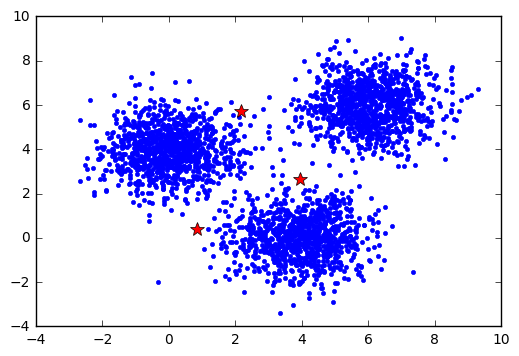

Iteration1
[[ 1.49633562  0.99009872]
 [ 5.24791845  2.45033911]
 [ 2.54754211  5.43519473]]


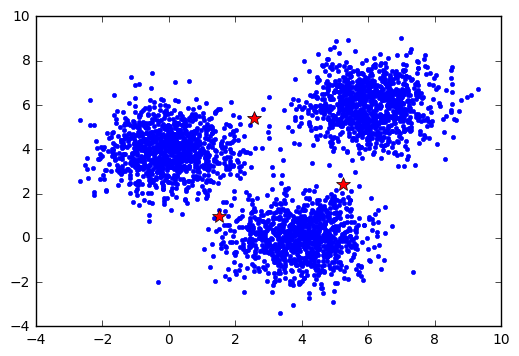

Iteration2
[[ 1.72239764  1.13159727]
 [ 5.68399525  2.82280413]
 [ 2.67525817  5.4921051 ]]


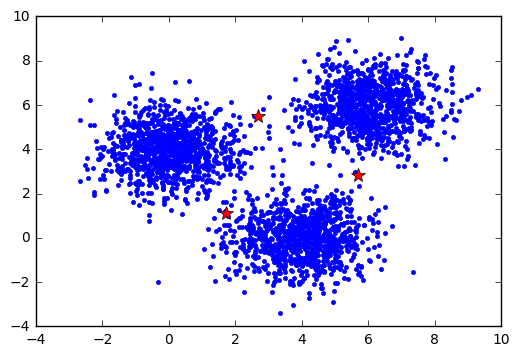

Iteration3
[[ 2.05989206  1.06334565]
 [ 6.04154818  3.73331344]
 [ 2.45491926  5.48914082]]


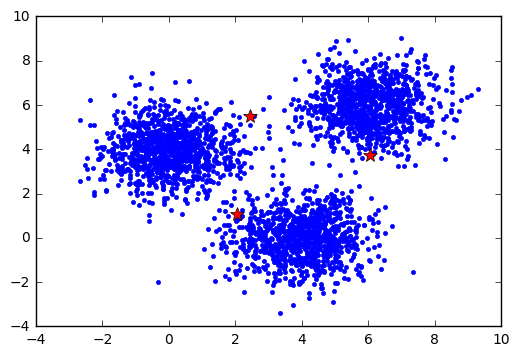

Iteration4
[[ 2.78690148  0.67370062]
 [ 6.24026241  5.43950264]
 [ 0.91423711  4.87796009]]


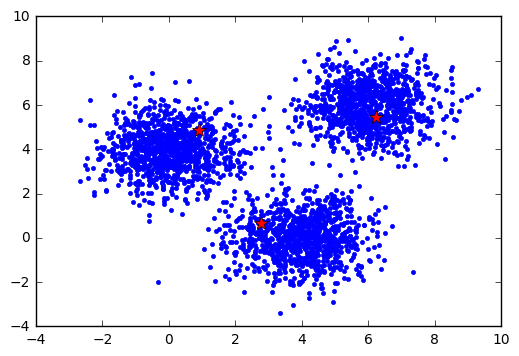

Iteration5
[[ 3.84259935  0.0574591 ]
 [ 6.08212315  5.97265591]
 [ 0.01007026  4.05166531]]


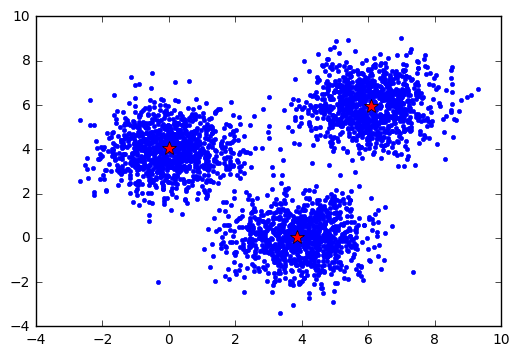

Iteration6
[[  3.94921451e+00   3.77491451e-03]
 [  6.07199246e+00   5.97850769e+00]
 [  1.66176798e-02   3.97587376e+00]]


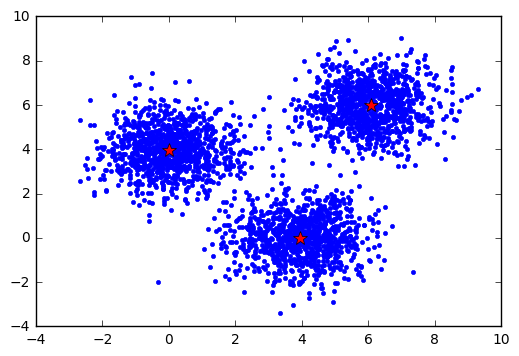

Final Results:
[[  3.94921451e+00   3.77491451e-03]
 [  6.07199246e+00   5.97850769e+00]
 [  1.66176798e-02   3.97587376e+00]]


In [8]:
# Distributed KMeans in Spark
K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])
centroidsBroadcast = sc.broadcast(centroids)  # broadcast centroids


D = sc.textFile("data.csv").cache()
iter_num = 0
for i in range(10):  
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    #res [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)  ), 
    #     (2, (array([ 6023.84995923,  5975.48511018]), 1000)), 
    #     (1, (array([ 3986.85984761,    15.93153464]), 999))]
    # res[1][1][1] returns 1000 here
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    
    if np.sum(np.absolute(centroids_new - centroidsBroadcast.value))<0.01:  # use ".value" of the broadcast centroids
        break
        
    print "Iteration" + str(iter_num)
    iter_num = iter_num + 1 
    
    centroidsBroadcast = sc.broadcast(centroids_new)  # update centroids and broadcast
    
    print centroidsBroadcast.value  # use ".value" to print the values of broadcast centroids
    
    plot_iteration(centroidsBroadcast.value)  # use ".value" to pass on the values of broadcast centroids to plot function
    
print "Final Results:"
print centroidsBroadcast.value

In [ ]:
# END STUDENT CODE 11.0

## HW11.1 Loss Functions

 
In the context of binary classification problems, does the linear SVM learning algorithm yield the same result as a L2 penalized logistic regesssion learning algorithm? 

In your reponse, please discuss the loss functions, and the learnt models, and separating surfaces between the two classes.


In the context of binary classification problems, does the linear SVM learning algorithm yield the same result as a perceptron learning algorithm? 

[OPTIONAL]: generate an artifical binary classification dataset with 2 input features and plot the learnt separating surface for both a linear SVM and for  logistic regression. Comment on the learnt surfaces. Please feel free to do this in Python (no need to use Spark).


### Response:


In [53]:
# START STUDENT CODE 11.1
# (ADD CELLS AS NEEDED)



** Q: In the context of binary classification problems, does the linear SVM learning algorithm yield the same result as a L2 penalized logistic regesssion learning algorithm? **  

The linear SVM and L2 penalized logistic regression learning algorithms do not minimize the same loss function. The linear SVM algorithm's objective is to find the hyperplane with minimal weights (equivalent of maximizing the margin of separating hyperplane) whereas the logistic regression algorithm's objective is to minimize the logloss (loss function). In other words, the loss function of the algorithms are different: hinge loss for linear SVM and log loss for logistic regression. Consequently, these 2 algorithms may yield different results and models from different separating hyperplanes (decision boundary).

In other words, logistic regression, based on input feature X, will evaluate P(X) using the logit function (sigmoid function) and if probability of one class is greater than 0.5, it will assume outcome equal to 1, otherwise will assume outcome equal to 0. Thus the separating hyperplane of the logistic regression occurs where the probability of one class is greater than 0.5. In case of linear SVM, it tries to find a hyperplane based on the data points at the edge of each class, or "support vectors by maximizing the margin.



** Q: In the context of binary classification problems, does the linear SVM learning algorithm yield the same result as a perceptron learning algorithm? **  

In the context of binary classification problems (2 classes), the perception model will stop when it finds weight vectors representing a hyperplane that separates all data points into two classes whereas the linear SVM model will find weight vectors representing a hyperplane that maximizes the margin. Thus, they will not yield the same result. In terms of loss functions, the perceptron loss function is similar to the linear SVM hinge loss. However, the perceptron only updates the weight when the output produced is different from the target labels (if the same, then returns a loss of zero) which is not the case of linear SVM algorithm.

In [ ]:
# END STUDENT CODE 11.1

## HW11.2 Gradient descent

In the context of logistic regression describe and define three flavors of penalized loss functions.  Are these all supported in Spark MLLib (include online references to support your answers)?

Describe probabilistic interpretations of the L1 and L2 priors for penalized logistic regression (HINT: see synchronous slides for week 11 for details)


### Response

Three flavors of penalized loss functions in logistic regression:

1. L1 ("Lasso"): ‖w‖  
    Penalized by L1 norm of weights vector

2. L2 ("Ridge"): 0.5 * ‖w‖^2  
    Penalized by L2 norm of weights vector

3. L1 + L2 ("Elastic Net"): alpha x ‖w‖ + (1-alpha) x 0.5 x ‖w‖^2  
    Penalized by a linear combination of L1 and L2 norms of weights vector

All 3 are supported in Spark MLLib (http://spark.apache.org/docs/latest/mllib-linear-methods.html#loss-functions)

** Probabilistic interpretations of the L1 and L2 priors for penalized logistic regression **

The L1 and L2 regularization terms add a constraint in finding the minimum of the loss function of the logistic regression model. The constraints for L1 and L2 are different.

For simplicity, as an example, let's consider 2 features (2 dimensional). Then there are 2 weights w1 and w2.  
- In case of L1, the constraint is that |w1| + |w2| must be less than a certain value, that is, geometrically speaking, that sum must be inside a diamond shape. Thus, this constraints adds a prior to the weights w1 and w2 when minimizing the loss function to find the w1 and w2, i.e., we cannot simply just find the w1 and w2 that minimize the loss function only but must also take into account the L1 constraint.  
  
- Similarly, L2 adds the constraint of |w1|^2 + |w2|^2 must be less than a certain value, that is, inside a circle shape. 




## HW11.3 Logistic Regression

Generate 2 sets of linearly separable data with 100 data points each using the data generation code provided below and plot each in separate plots. Call one the training set and the other the testing set.

```python
def generateData(n):
 """ 
  generates a 2D linearly separable dataset with n samples. 
  The third element of the sample is the label
 """
 xb = (rand(n)*2-1)/2-0.5
 yb = (rand(n)*2-1)/2+0.5
 xr = (rand(n)*2-1)/2+0.5
 yr = (rand(n)*2-1)/2-0.5
 inputs = []
 for i in range(len(xb)):
  inputs.append([xb[i],yb[i],1])
  inputs.append([xr[i],yr[i],-1])
 return inputs

```
Modify this data generation code to generating non-linearly separable training and testing datasets (with approximately 10% of the data falling on the wrong side of the separating hyperplane. Plot the resulting datasets. 

NOTE: For the remainder of this problem please use the non-linearly separable training and testing datasets.

Using MLLib  train up a LASSO logistic regression model with the training dataset and evaluate with the testing set. What a good number of iterations for training the logistic regression model? Justify with plots and words. 

Derive and implement in Spark a weighted  LASSO logistic regression. Implement a convergence test of your choice to check for termination within your training algorithm . 

Weight the above training dataset as follows:  Weight each example using the inverse vector length (Euclidean norm): 

>weight(X)= 1/||X||, 

>where ||X|| = SQRT(X.X)= SQRT(X1^2 + X2^2)

>Here X is vector made up of X1 and X2.

Evaluate your homegrown weighted  LASSO logistic regression on the test dataset. Report misclassification error (1 - Accuracy) and how many iterations does it took to converge.

Does Spark MLLib have a weighted LASSO logistic regression implementation. If so use it and report your findings on the weighted training set and test set. 

In [59]:
# START STUDENT CODE 11.3
# (ADD CELLS AS NEEDED)



In [15]:
import numpy as np
from numpy.random import rand

def generateData(n):
    """ 
    generates a 2D linearly separable dataset with n samples. 
    The third element of the sample is the label
    """
    xb = (rand(n)*2-1)/2-0.5
    yb = (rand(n)*2-1)/2+0.5
    xr = (rand(n)*2-1)/2+0.5
    yr = (rand(n)*2-1)/2-0.5
    inputs = []
    for i in range(len(xb)):
        inputs.append([xb[i],yb[i],1])
        inputs.append([xr[i],yr[i],-1])
    return inputs

In [17]:
# Generate 2 datasets with 100 data points for each class
training_set = generateData(100)
testing_set = generateData(100)

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

def plotData(data, title):
    for x, y, label in data:
        colors = {1:'r', -1:'b'}
        plt.plot(x, y, colors[label]+'o')
    
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

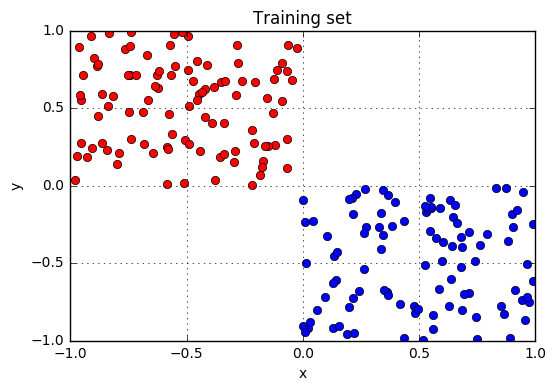

In [27]:
plotData(training_set,"Training set")

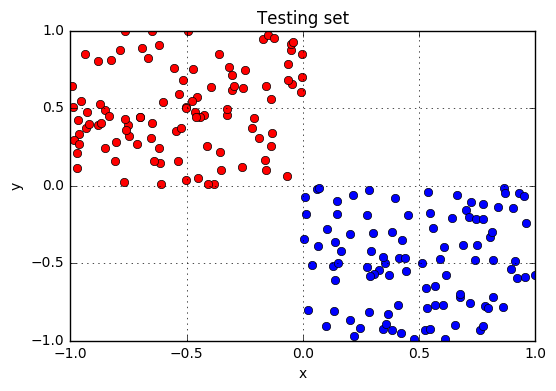

In [28]:
plotData(testing_set, "Testing set")

In [88]:
# Generate non-linearly separable datasets
# Approximately 10% of the data falling on the wrong side of the separating hyperplane

import numpy as np
from numpy.random import rand
import csv

def generateDataNonLinear(n, wrong_rate, fileName):
    """ 
    Generates a 2D (1-wrong_rate) linearly separable and wrong_rate non-linearly separable dataset with n samples 
    The third element of the sample is the label
    """
    linearly_separable = generateData(n)
    random_side = rand(2*n)  # n random numbers between 0 and 1
                           # Since random numbers uniformly chosen between 0 and 1,
                           # to flag approx. 10% of data, can split data using criteria random number < 0.10
    
    linearly_not_separable = [[x, y] + [label * (1 - 2*(side <= wrong_rate))] \
                              for (x, y, label), side in zip(linearly_separable, random_side)]
    
    with open(fileName,'wb') as f:
        writer = csv.writer(f)
        for row in linearly_not_separable:
            writer.writerow(row)
    
    return linearly_not_separable

In [89]:
training_set = generateDataNonLinear(100, 0.10, "training_data.csv")
testing_set = generateDataNonLinear(100, 0.10, "testing_data.csv")

In [90]:
# To check if approximately 10% of data points on the wrong side
wrong_side_count_training = sum([1 for data in training_set if (data[1] * data[2]) < 0])
wrong_side_ratio_training = wrong_side_count_training/(2*100.0)
print "Fraction of training data points on the wrong side:", wrong_side_ratio_training

wrong_side_count_testing = sum([1 for data in testing_set if (data[1] * data[2]) < 0])
wrong_side_ratio_testing = wrong_side_count_testing/(2*100.0)
print "Fraction of testing data points on the wrong side:", wrong_side_ratio_testing


Fraction of training data points on the wrong side: 0.12
Fraction of testing data points on the wrong side: 0.125


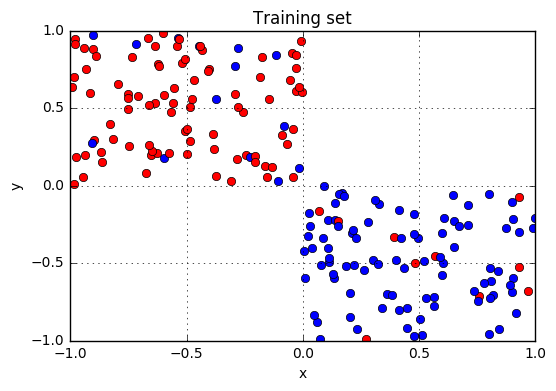

In [91]:
plotData(training_set,"Training set")

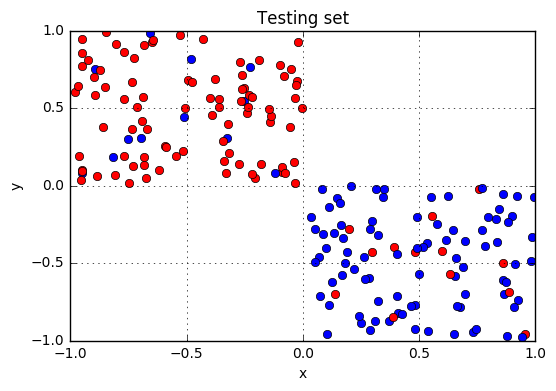

In [92]:
plotData(testing_set,"Testing set")

Using MLLib  train up a LASSO logistic regression model with the training dataset and evaluate with the testing set. What is a good number of iterations for training the logistic regression model? Justify with plots and words. 

In [185]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel
from pyspark.mllib.regression import LabeledPoint

# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint((values[-1]+1)/2, values[:-1])  #the input shoul be {0,1} instead of {-1,1}


def iterations_plot(training_filename, testing_filename, max_iterations):
    x = [-1.0,1.0]
    
    training_data = sc.textFile(training_filename).map(parsePoint).cache()
    testing_data = sc.textFile(testing_filename).map(parsePoint).cache()

    #data = training_data.map(lambda datapoint: [datapoint]+[1.0]).cache()  # Add bias term
    #data_testing = testing_data.map(lambda datapoint: [datapoint]+[1.0]).cache()  # Add bias term
    data = training_data
    data_testing = testing_data
    n = data_testing.count()  
    
    
    for iteration in range(max_iterations+1):
        print ""
        print "Iterations:", iteration
        
        # Build lasso logistic regression model
        model = LogisticRegressionWithLBFGS.train(data, iterations=iteration, regType="l1", regParam=0.1, intercept=True)
        print model
        
        # Calculate error on testing data
        labelsAndPreds = data_testing.map(lambda p: (p.label, model.predict(p.features)))
        trainErr = labelsAndPreds.filter(lambda (v, p): v != p).count() / float(n)
        print("Training Error = " + str(trainErr))
        
        # Plot separating hyperplane
        w = [model.weights[0], model.weights[1], model.intercept]
        y = [-(i * w[0] + w[2]) / w[1] for i in x]
        plt.plot(x, y, 'm--', label=str(iteration)+" Iterations", linewidth=2.0/(max_iterations)*(iteration+1))
        
    
    # Plot testing data points
    colors = {'1':'r', '-1':'b'}
    with open(testing_filename,'r') as f:
        reader = csv.reader(f)
        for row in reader:
            plt.plot(float(row[0]), float(row[1]), colors[row[2]]+'o')
    
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=10, borderaxespad=0.)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Testing data points and hyperplanes from Lasso Logistic Regression")
    plt.grid()
    plt.show()



Iterations: 0
(weights=[0.0,0.0], intercept=0.0)
Training Error = 0.505


/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in double_scalars



Iterations: 1
(weights=[-0.190747236251,0.188240668026], intercept=-0.009628201239823133)
Training Error = 0.125

Iterations: 2
(weights=[-0.913633721508,0.900563864788], intercept=-0.08773419459566342)
Training Error = 0.13

Iterations: 3
(weights=[-1.01971597238,1.00155628672], intercept=-0.12098410213603299)
Training Error = 0.13

Iterations: 4
(weights=[-1.05014320784,1.02556195368], intercept=-0.14070806007208148)
Training Error = 0.13

Iterations: 5
(weights=[-1.05389863763,1.02358824401], intercept=-0.14558463100538638)
Training Error = 0.13

Iterations: 6
(weights=[-1.05730049798,1.01971825594], intercept=-0.1467598921658943)
Training Error = 0.13

Iterations: 7
(weights=[-1.06340610689,1.01371380197], intercept=-0.1467461078402023)
Training Error = 0.13

Iterations: 8
(weights=[-1.06421395485,1.01229465601], intercept=-0.14616796375973867)
Training Error = 0.13

Iterations: 9
(weights=[-1.06435458737,1.01239941611], intercept=-0.1461584623587271)
Training Error = 0.13

Iterat

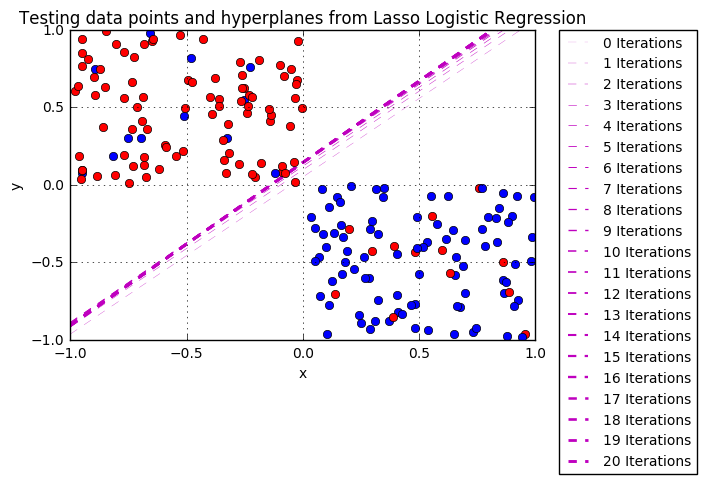

In [186]:
iterations_plot("training_data.csv", "testing_data.csv", 20)

### Homegrown weighted LASSO logistic regression

Derive and implement in Spark a weighted  LASSO logistic regression. Implement a convergence test of your choice to check for termination within your training algorithm . 

Weight the above training dataset as follows:  Weight each example using the inverse vector length (Euclidean norm): 

>weight(X)= 1/||X||, 

>where ||X|| = SQRT(X.X)= SQRT(X1^2 + X2^2)

>Here X is vector made up of X1 and X2.

Evaluate your homegrown weighted  LASSO logistic regression on the test dataset. Report misclassification error (1 - Accuracy) and how many iterations does it took to converge.

In [305]:
def logisticRegressionGDLasso(data, wInitial=None, learningRate=0.05, iterations=10, regParam=0.1, regType="Lasso", 
                             stopCriteria=0.001):
    n = data.count()
    
    # Initialize weights vector including intercept
    featureLen = len(data.take(1)[0]) - 2  # to remove data weight and label
    if wInitial == None:
        w = [0.0] * featureLen  # Set to zero to mimic the default MLLib initial weights
        #w = np.random.normal(size=featureLen)
    else:
        w = wInitial
    
    # Calculate gradient - loss term only
    for i in range(iterations):        
        wBroadcast = sc.broadcast(w)
        gradient = data.map(lambda d: (d[-2] * 1 / (1 + np.exp(-d[-1]*np.dot(wBroadcast.value, d[:-2])))-1) * d[-1] * np.array(d[:-2]))\
                    .reduce(lambda a, b: a + b)
    
        # Calculate regularization term
        if regType == "Lasso":
            wReg = w * 1
            wReg[-1] = 0  # last value of weight vector is bias term, ignored in regularization
            wReg = np.sign(w)

        elif regType == "Ridge":
            wReg = w * 1
            wReg[-1] = 0  # last value of weight vector is bias term, ignored in regularization 

        else:
            wReg = np.zeros(w.shape[0])

        # Calculate gradient with regularization
        gradient = gradient + regParam * wReg  #gradient:  GD of Sqaured Error+ GD of regularized term 
        wdelta = learningRate * gradient/n
        
        # Convergence test (converged as updates to weight vector are small)
        if sum(abs(wdelta)) <= stopCriteria*sum(abs(np.array(w))):
            #print "Converged at iteration:", i
            break

        # Update weights
        w = w - wdelta
    
    return w
        
        

In [296]:
# Add 1/||X|| to the data points for weighted logistic regression

def calcWeight(features):
    #weight = 1.0  # not weighted data points
    weight = 1/(features[0]**2 + features[1]**2) ** 0.5  # weighted data points
    return weight

# +1.0 for bias term and + weight for 1/norm of X (x and y in this case)
training_data = sc.textFile("training_data.csv").map(lambda line: [float(v) for v in line.split(',')])\
                                                .map(lambda data: data[:2] + [1.0] + [calcWeight(data[:2])] + data[2:])\
                                                .cache()
testing_data = sc.textFile("testing_data.csv").map(lambda line: [float(v) for v in line.split(',')])\
                                              .map(lambda data: data[:2] + [1.0] + [calcWeight(data[:2])] + data[2:])\
                                              .cache()

# Check a data point to see if intercept and weight well calculated and inserted
training_data.take(1)

[[-0.044191051312025054, 0.854798033032444, 1.0, 1.1683067935135778, 1.0]]

In [297]:
# Test with 20 iterations
w=[0.0,0.0,0.0]
logisticRegressionGDLasso(training_data, w , iterations=20, regType="Lasso")

array([-0.11351542,  0.11050151,  0.0477618 ])

In [301]:
def calcWeight(features):
    #weight = 1.0  # not weighted data points
    weight = 1/((features[0]**2 + features[1]**2) ** 0.5)  # weighted data points
    return weight


def iterationsPlot(training_filename, testing_filename, max_iterations):
    x = [-1.0, 1.0]
    
    data = sc.textFile(training_filename).map(lambda line: [float(v) for v in line.split(',')])\
                                         .map(lambda data: data[:2] + [1.0] + [calcWeight(data[:2])] + data[2:])\
                                         .cache()
    testing_data = sc.textFile(testing_filename).map(lambda line: [float(v) for v in line.split(',')])\
                                              .map(lambda data: data[:2] + [1.0] + [calcWeight(data[:2])] + data[2:])\
                                              .cache()
    n = testing_data.count()
    w = None # Initialize w vectors - same as MLLib
    model_tracking = []
    
    for iteration in range(max_iterations + 1):
        
        # Building and training model
        w = logisticRegressionGDLasso(data, w, iterations=2)
        
        # Plot the boundary line for every 10 iterations
        if iteration % 10 == 0:
            y = [-(i * w[0] + w[2]) / w[1] for i in x]
            plt.plot(x, y, 'm', label=str(iteration)+" Iterations", linewidth=1.0/(max_iterations)*(iteration+1))
        
        # Calculate the predicted class from model on training data (label, predicted)
        labelsAndPreds = testing_data.map(lambda d: (int(d[-1]), ((w[0]*d[0] + w[1]*d[1] + w[2])>0) * 2 -1 ))
        trainErr = labelsAndPreds.filter(lambda (v, p): v != p).count() / float(n)
        
        # Print for 10 first iterations, then every 10th iteration
        if (iteration % 10 == 0) or (iteration <= 10) :
            print ""
            print "Iterations:", iteration
            print "Model: weights (w1, w2 and intercept)", w
            print "Misclassification error = ", trainErr
        
        model_tracking.append([iteration, trainErr, w])
        
    # Plot testing data points
    colors = {'1':'r', '-1':'b'}
    with open(testing_filename,'r') as f:
        reader = csv.reader(f)
        for row in reader:
            plt.plot(float(row[0]), float(row[1]), colors[row[2]]+'o')
    
    plt.title("Testing data points and hyperplanes from Weighted Lasso Logistic Regression")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=10, borderaxespad=0.)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()
    
    return model_tracking


Iterations: 0
Model: weights (w1, w2 and intercept) [-0.01219798  0.01190785  0.00588584]
Misclassification error =  0.185


/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.



Iterations: 1
Model: weights (w1, w2 and intercept) [-0.02417948  0.02359674  0.01147308]
Misclassification error =  0.19

Iterations: 2
Model: weights (w1, w2 and intercept) [-0.03597284  0.035095    0.01680008]
Misclassification error =  0.19

Iterations: 3
Model: weights (w1, w2 and intercept) [-0.04758115  0.04640572  0.02187904]
Misclassification error =  0.19

Iterations: 4
Model: weights (w1, w2 and intercept) [-0.05900751  0.05753197  0.02672162]
Misclassification error =  0.19

Iterations: 5
Model: weights (w1, w2 and intercept) [-0.07025496  0.06847679  0.03133896]
Misclassification error =  0.19

Iterations: 6
Model: weights (w1, w2 and intercept) [-0.08132651  0.07924319  0.03574171]
Misclassification error =  0.19

Iterations: 7
Model: weights (w1, w2 and intercept) [-0.09222515  0.08983415  0.03994004]
Misclassification error =  0.185

Iterations: 8
Model: weights (w1, w2 and intercept) [-0.10295382  0.10025262  0.04394365]
Misclassification error =  0.185

Iterations: 9

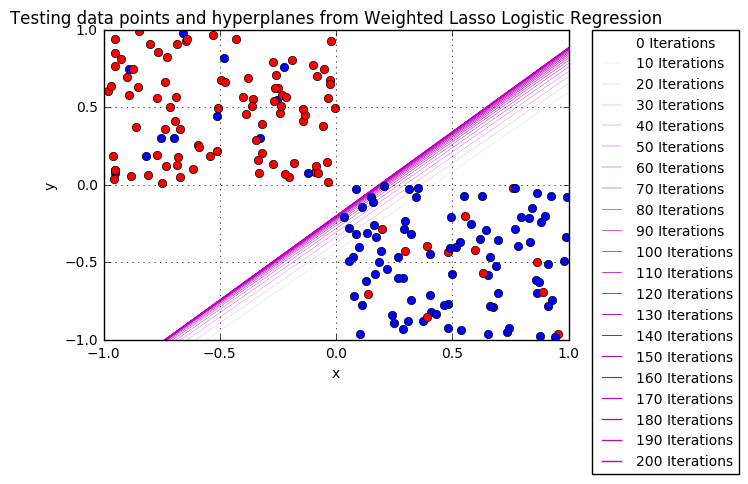

In [307]:
weighted_LogReg_tracking = iterationsPlot("training_data.csv", "testing_data.csv", 200)

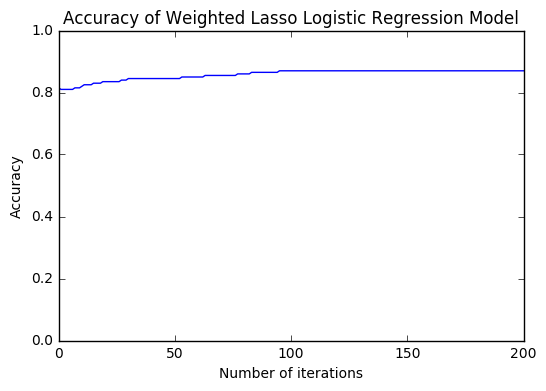

In [313]:
# Plots to justify the number of iterations
# 1. Accuracy

x = [data[0]+1 for data in weighted_LogReg_tracking]
accuracy = [1.0-data[1] for data in weighted_LogReg_tracking]


plt.plot(x, accuracy, linewidth=1.0)
plt.title("Accuracy of Weighted Lasso Logistic Regression Model")
plt.ylim([0,1])
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.show()

Iterations     Model change   
1              0.493805521204 
10             0.0815177600218
20             0.0385630529247
30             0.023733116872 
40             0.0163807985255
50             0.0120643537947
60             0.00926395954632
70             0.00732233071059
80             0.00591081778987
90             0.00484778962458
100            0.00402515626192


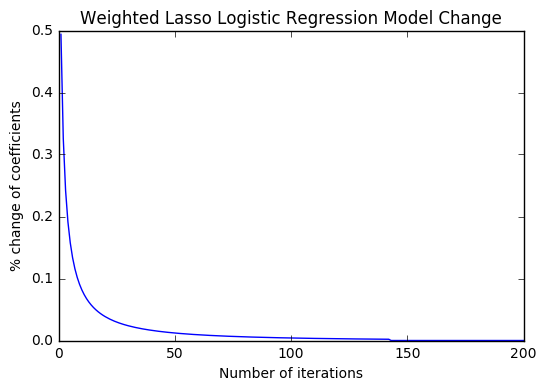

In [309]:
# Plots to justify the number of iterations
# 1. Model change

x = [data[0] for data in weighted_LogReg_tracking]

w_prev = np.array([data[2] for data in weighted_LogReg_tracking[:-1]])
w_after = np.array([data[2] for data in weighted_LogReg_tracking[1:]])
w_change = np.sum(abs(w_prev - w_after), axis=1)/np.sum(abs(w_after),axis=1)

print '{:<15s}{:<15s}'.format("Iterations","Model change")
print '{:<15s}{:<15s}'.format("1",str(w_change[0]))
for i in range(9,100,10):
    print '{:<15s}{:<15s}'.format(str(i+1),str(w_change[i]))

plt.plot(x[1:], w_change, linewidth=1.0)
plt.title("Weighted Lasso Logistic Regression Model Change")
plt.xlabel("Number of iterations")
plt.ylabel("% change of coefficients")
plt.show()

Findings:
Based on the convergence criteria defined in the plot_iterations function, the weights converged after around 140 iterations. However, the misclassification error (1-accuracy) converged faster to a minimum after 100 iterations. A good number of iterations should be around 100 to 140 iterations.

### Spark MLLib weighted LASSO logistic regression

Does Spark MLLib have a weighted LASSO logistic regression implementation. If so use it and report your findings on the weighted training set and test set. 

I could not find a built-in weighted LASSO logistic regression in Spark MLLib. However the built-in non-weighted LASSO regression in Spark MLLib can be used with an adjusted input features (divided by norm).

In [249]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel
from pyspark.mllib.regression import LabeledPoint

# Load and parse the data
def parsePointW(line):
    values = [float(x) for x in line.split(',')]
    x = list(values[:2]/np.sqrt(np.sum(np.array(values[:2])**2)))  # weighted data features
    return LabeledPoint((values[-1]+1)/2, x)  #the input should be {0,1} instead of {-1,1}


def iterations_plot_weightedLogReg(training_filename, testing_filename, max_iterations):
    x = [-1.0,1.0]
    
    training_data = sc.textFile(training_filename).map(parsePointW).cache()
    testing_data = sc.textFile(testing_filename).map(parsePointW).cache()

    data = training_data
    data_testing = testing_data
    n = data_testing.count()  
    
    
    for iteration in range(max_iterations+1):
        print ""
        print "Iterations:", iteration
        
        # Build lasso logistic regression model
        model = LogisticRegressionWithLBFGS.train(data, iterations=iteration, regType="l1", regParam=0.1, intercept=True)
        print model
        
        # Calculate error on testing data
        labelsAndPreds = data_testing.map(lambda p: (p.label, model.predict(p.features)))
        trainErr = labelsAndPreds.filter(lambda (v, p): v != p).count() / float(n)
        print("Training Error = " + str(trainErr))
        
        # Plot separating hyperplane
        w = [model.weights[0], model.weights[1], model.intercept]
        y = [-(i * w[0] + w[2]) / w[1] for i in x]
        plt.plot(x, y, 'm--', label=str(iteration)+" Iterations", linewidth=2.0/(max_iterations)*(iteration+1))
        
    
    # Plot testing data points
    colors = {'1':'r', '-1':'b'}
    with open(testing_filename,'r') as f:
        reader = csv.reader(f)
        for row in reader:
            plt.plot(float(row[0]), float(row[1]), colors[row[2]]+'o')
    
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=10, borderaxespad=0.)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Testing data points and hyperplanes from Lasso Logistic Regression")
    plt.grid()
    plt.show()



Iterations: 0
(weights=[0.0,0.0], intercept=0.0)
Training Error = 0.505

Iterations: 1


/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in double_scalars


(weights=[-0.160936806711,0.152388200148], intercept=-0.008964003747992685)
Training Error = 0.125

Iterations: 2
(weights=[-0.856873725433,0.800177438729], intercept=-0.06808923677316196)
Training Error = 0.125

Iterations: 3
(weights=[-0.947745380038,0.871398294287], intercept=-0.09167244476000706)
Training Error = 0.125

Iterations: 4
(weights=[-0.977616391406,0.880892530031], intercept=-0.10792622337976385)
Training Error = 0.125

Iterations: 5
(weights=[-0.989532764982,0.87294787064], intercept=-0.11525080925635779)
Training Error = 0.125

Iterations: 6
(weights=[-1.00787548625,0.854870250523], intercept=-0.1176746544202587)
Training Error = 0.125

Iterations: 7
(weights=[-1.00787548625,0.847009032221], intercept=-0.1155364521334317)
Training Error = 0.125

Iterations: 8
(weights=[-1.01234223328,0.847009032221], intercept=-0.1155364521334317)
Training Error = 0.125

Iterations: 9
(weights=[-1.01258717256,0.847009032221], intercept=-0.1155594338488519)
Training Error = 0.125

Itera

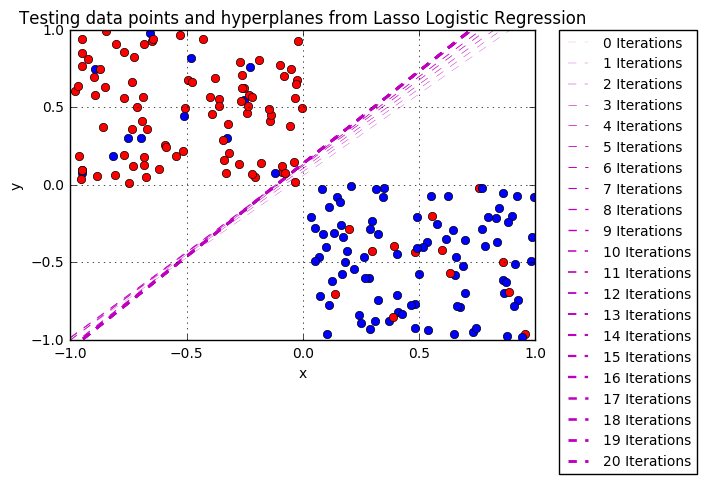

In [251]:
iterations_plot_weightedLogReg("training_data.csv", "testing_data.csv", 20)

Using the built-in MLLib lasso logistic regression, the coefficients converges at 9 iterations, that is, they converge much faster than in the homegrown implementation.

In [ ]:
# END STUDENT CODE 11.3

### Response

## HW11.4 SVMs

Use the non-linearly separable training and testing datasets from HW11.3 in this problem.

Using MLLib  train up a soft SVM model with the training dataset and evaluate with the testing set. What is a good number of iterations for training the SVM model? Justify with plots and words. 

__HW11.4.1 [Optional]__
Derive and Implement in Spark a weighted hard linear svm classification learning algorithm. Feel free to use the following notebook as a starting point  
> [SVM Notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/dm2l73iznde7y4f/SVM-Notebook-Linear-Kernel-2015-06-19.ipynb).

Evaluate your homegrown weighted  linear svm classification learning algorithm on the  weighted training dataset and test dataset from HW11.3 (linearly separable dataset). Report misclassification error (1 - Accuracy) and how many iterations does it took to converge?  How many support vectors do you end up with?

Does Spark MLLib have a weighted soft SVM learner. If so use it and report your findings on the weighted training set and test set.  

__HW11.4.2 [Optional]__
Repeat HW11.4.2 using a soft SVM and a nonlinearly separable datasets. Compare the error rates that you get here with the error rates you achieve using MLLib's soft SVM. Report the number of support vectors in both cases (may not be available the MLLib implementation).


In [ ]:
# START STUDENT CODE 11.4
# (ADD CELLS AS NEEDED)



In [218]:
from pyspark.mllib.classification import SVMWithSGD, SVMModel
from pyspark.mllib.regression import LabeledPoint

# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint((values[-1]+1)/2, values[:-1])  #the input shoul be {0,1} instead of {-1,1}


def iterations_plotSVM(training_filename, testing_filename, max_iterations):
    x = [-1.0,1.0]
    
    training_data = sc.textFile(training_filename).map(parsePoint).cache()
    testing_data = sc.textFile(testing_filename).map(parsePoint).cache()

    data = training_data
    data_testing = testing_data
    n = data_testing.count()  
    
    # Plot "true" line
    y = [-1,1]
    plt.plot(x, y, 'b--', label="True line", linewidth=1.0)
    
    model_tracking = []
    
    for iteration in range(max_iterations+1):
        print ""
        print "Iterations:", iteration
        
        # Build lasso logistic regression model
        model = SVMWithSGD.train(data, iterations=iteration, intercept=True)
        # Other parameters by default: step=1.0, regParam=0.01, miniBatchFraction=1.0, initialWeights=None, 
        # regType='l2', validateData=True, convergenceTol=0.001
        print model

        # Calculate error on testing data
        labelsAndPreds = data_testing.map(lambda p: (p.label, model.predict(p.features)))
        trainErr = labelsAndPreds.filter(lambda (v, p): v != p).count() / float(n)
        print("Misclassification Error = " + str(trainErr))
        
        model_tracking.append([iteration, trainErr, model.weights])
                          
        # Plot separating hyperplane (only every 10th iterations)
        if iteration % 10 == 0:
            w = [model.weights[0], model.weights[1], model.intercept]
            y = [-(i * w[0] + w[2]) / w[1] for i in x]
            plt.plot(x, y, 'm', label=str(iteration)+" Iterations", linewidth=2.0/(max_iterations)*(iteration+1))
            
    
    # Plot testing data points
    colors = {'1':'r', '-1':'b'}
    with open(testing_filename,'r') as f:
        reader = csv.reader(f)
        for row in reader:
            plt.plot(float(row[0]), float(row[1]), colors[row[2]]+'o')
    
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=10, borderaxespad=0.)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Testing data points and hyperplanes from SVM")
    plt.grid()
    plt.show()
    
    return model_tracking



Iterations: 0
(weights=[0.0,0.0], intercept=1.0)
Misclassification Error = 0.495

Iterations: 1


/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: divide by zero encountered in double_scalars


(weights=[-0.17187673119,0.174591923261], intercept=0.47)
Misclassification Error = 0.495

Iterations: 2
(weights=[-0.429120500413,0.434717378313], intercept=0.43839232688096125)
Misclassification Error = 0.315

Iterations: 3
(weights=[-0.586689931522,0.589626365318], intercept=0.34348522453126723)
Misclassification Error = 0.215

Iterations: 4
(weights=[-0.700303942708,0.706553541283], intercept=0.2292677984086109)
Misclassification Error = 0.155

Iterations: 5
(weights=[-0.795916621179,0.805728422239], intercept=0.1298554906340334)
Misclassification Error = 0.13

Iterations: 6
(weights=[-0.864264993242,0.878106925949], intercept=0.059923148434589776)
Misclassification Error = 0.125

Iterations: 7
(weights=[-0.91087047793,0.929519647852], intercept=0.01623074582633731)
Misclassification Error = 0.125

Iterations: 8
(weights=[-0.947320564233,0.972149920727], intercept=-0.013878676726278554)
Misclassification Error = 0.125

Iterations: 9
(weights=[-0.976771976419,1.00453708039], interce

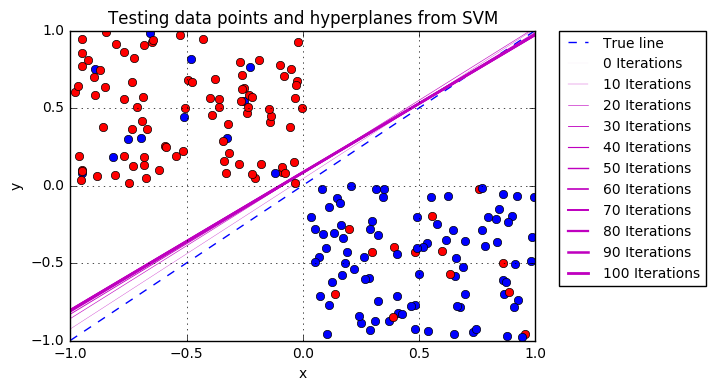

In [219]:
svm_tracking = iterations_plotSVM("training_data.csv", "testing_data.csv", 100)

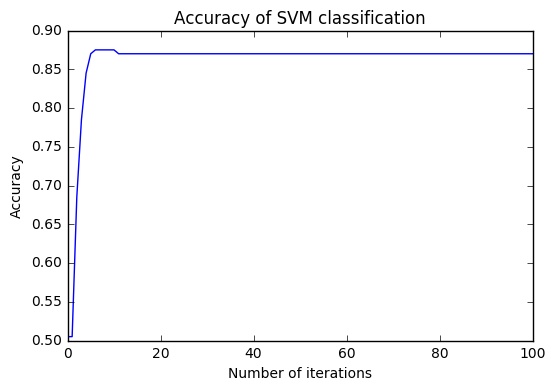

In [314]:
# Plots to justify the number of iterations
# 1. Accuracy

x = [data[0] for data in svm_tracking]
accuracy = [1.0-data[1] for data in svm_tracking]


plt.plot(x, accuracy, linewidth=1.0)
plt.title("Accuracy of SVM classification")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.show()

Iterations     Model change   
1              1.0            
10             0.0263538750857
20             0.00590583076201
30             0.00330834790406
40             0.00114610336939
50             0.0            
60             0.0            
70             0.0            
80             0.0            
90             0.0            
100            0.0            


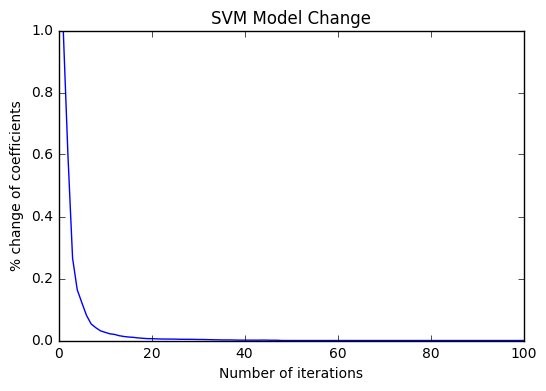

In [247]:
# Plots to justify the number of iterations
# 1. Model change

x = [data[0] for data in svm_tracking]

w_prev = np.array([data[2] for data in svm_tracking[:-1]])
w_after = np.array([data[2] for data in svm_tracking[1:]])
w_change = np.sum(abs(w_prev - w_after), axis=1)/np.sum(abs(w_after),axis=1)

print '{:<15s}{:<15s}'.format("Iterations","Model change")
print '{:<15s}{:<15s}'.format("1",str(w_change[0]))
for i in range(9,100,10):
    print '{:<15s}{:<15s}'.format(str(i+1),str(w_change[i]))

plt.plot(x[1:], w_change, linewidth=1.0)
plt.title("SVM Model Change")
plt.xlabel("Number of iterations")
plt.ylabel("% change of coefficients")
plt.show()

Compared to the MLLib logistic regression, the MLLib SVM converges slower.
The SVM model converges around 50 iterations (the weights/coefficients and intercept do not change after 47 iterations). However, the misclassification error does not change after approximately 10 iterations (the minimum error is reached after 6 iterations), that is, the maximum accuracy is reached around 10 iterations.

Thus, even though the maximum accuracy is reached around 10 iterations, a good number of iterations for training should be 50 iterations since the SVM model is to minimize the margin and the model converges after 50 iterations to reach that objective.

In [ ]:
# END STUDENT CODE 11.4